In [29]:
from BIFParser import *
import Factor

from random import uniform
import numpy as np
import pandas as pd
import copy
from matplotlib.pyplot import plot
from matplotlib.pyplot import figure

from time import time

In [10]:
def generate_nodes(path):
    file = open(path)
    BIF = file.readlines()
    BIF = fixWhiteSpace(BIF)
    return parseBIF(BIF)

In [108]:
def selectIndex(dist, val):
    n = 0
    for i in range(len(dist)) :
        n += dist[i]
        if n>=val:
            return i

def getValue(rv, v, n):
    if(rv[n.getIndex()]!=None):
        return rv[n.getIndex()]
    if n.numParents() == 0:
        rv[n.getIndex()] = selectIndex(n.getDist().values()[0], v[n.getIndex()])
        return rv[n.getIndex()]
    key = ((n.getStates(), ))
    p_key = ()
    for p in n.getParents():
        p_key += (p.getStates()[getValue(rv, v, p)], )
    key+= (p_key, )
    rv[n.getIndex()] = selectIndex(n.getDist()[key], v[n.getIndex()])
    return rv[n.getIndex()]

def sample(nodes, node=None, val_index=None):
    v = [uniform(0,1) for n in nodes]
    rv = {n.getIndex(): None for n in nodes}
    if(node!=None and val_index!=None):
        rv[node.getIndex()] = val_index
    sample = []
    for n in nodes:
        sample.append(getValue(rv, v, n))
    return sample

In [82]:
def converge(last_values, new_values):
    val = 0
    for i in range(len(last_values)):
        val += np.abs(last_values[i] - new_values[i])
        
    return True if val <= 0.0000001 else False

In [92]:
def hope(nodes, sample, n):
    b = 1.0
    a = 1.0
    
    for node in n.getChildren():
        key = (node.getStates(), )
        p_vals = ()
        for p in node.getParents():
            states = p.getStates()
            p_vals += (states[sample[p.getIndex()]], )
        key += (p_vals, )
        b *= node.dist.get(key)[sample[node.getIndex()]]
        a *= 1-node.dist.get(key)[sample[node.getIndex()]]
        
    if n.isRoot():
        b *= n.dist.get(n.getStates())[int(sample[n.getIndex()])]
        a *= 1-n.dist.get(n.getStates())[int(sample[n.getIndex()])]
    else:
        key = (n.getStates(), )
        p_vals = ()
        for p in n.getParents():
            states = p.getStates()
            p_vals += (states[sample[p.getIndex()]], )
        key += (p_vals, )
        b *= n.dist.get(key)[sample[n.getIndex()]]
        a *= 1-n.dist.get(key)[sample[n.getIndex()]]
        

    a = b + a
    return b/a if a!= 0 else 0

In [186]:
def gibbs_sampling(path):
#     chart_data = []
    nodes = generate_nodes(path)
#     num_int = 0
#     len_nodes = len(nodes)
#     last_values = [uniform(0, 1) for i in range(len_nodes)]
#     new_values = [uniform(0, 1) for i in range(len_nodes)]
    
    selected_node = nodes[0]
    selected_node_vals = 1
    test_data = []
    
    cont_vals = [0.0 for i in selected_node.getStates()]
    num_times = 1000
    t = time()
    for i in range(num_times):
        s = sample(nodes)
        cont_vals[s[selected_node.getIndex()]]+=1
        test_data += [[cont_val/(i+1) for cont_val in cont_vals]]
        
    print time() - t
    df = pd.DataFrame(np.array(test_data), columns=selected_node.getStates())
    df.plot(figsize=(15,5))
    return df


17.1926050186


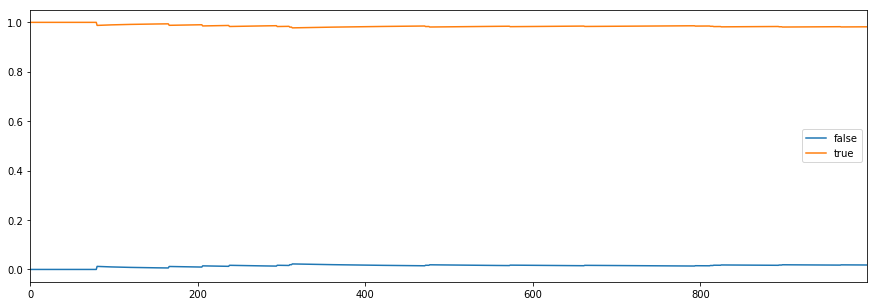

In [187]:
df = gibbs_sampling('data/ANDES/andes.bif')

In [183]:
df.tail(1)

,false,true
999,0.018,0.982


In [14]:
n[0].dist.values()[0][1]

# for nn in n:
#     print nn.printNode()
#     print nn.getDist().keys()

0.99

In [33]:
np.abs(2.0-1)

1.0

In [79]:
n[0].dist

{('yes', 'no'): (0.01, 0.99)}

In [25]:
print n[0].dist.get("('yes', 'no')

None


In [82]:
n[1].getParents()

[<Node.Node instance at 0x1058d3488>]

In [86]:
n[1].getStates()

('yes', 'no')

In [87]:
n[1].getDist()

{(('yes', 'no'), ('no',)): (0.01, 0.99),
 (('yes', 'no'), ('yes',)): (0.05, 0.95)}

In [89]:
n[1].getParents()

[<Node.Node instance at 0x11b4680e0>]